In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Data/test/clear/test2.jpg
/kaggle/input/Data/test/clear/test1.jpg
/kaggle/input/Data/test/snowy/test3.JPG
/kaggle/input/Data/test/snowy/test4.jpg
/kaggle/input/Data/train/clear/pexels-photo-734825-760x506.jpeg
/kaggle/input/Data/train/clear/slush road.jpg
/kaggle/input/Data/train/clear/snowy-winter-road.jpg
/kaggle/input/Data/train/clear/winter-road-e1546276522279.jpg
/kaggle/input/Data/train/clear/photo_verybig_193531.jpg
/kaggle/input/Data/train/clear/snowy.jpeg
/kaggle/input/Data/train/clear/clear.jpg
/kaggle/input/Data/train/clear/icy-e1575575180519.jpg
/kaggle/input/Data/train/clear/clea.jpg
/kaggle/input/Data/train/clear/Dirt_road_in_winter.JPG
/kaggle/input/Data/train/clear/photo-1444136755757-b24e7e5c4cd5.jpeg
/kaggle/input/Data/train/clear/empty-country-road-snowy-forest-260nw-522931834.jpg.jp2
/kaggle/input/Data/train/snowy/snow-vpr-noyes-20181113.jpg
/kaggle/input/Data/train/snowy/forest_winter_snow_134909_3024x4032.jpg
/kaggle/input/Data/train/snowy/150033703-

In [22]:
import keras as ks
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import backend as k
from keras.applications.inception_v3 import InceptionV3
from keras.applications import InceptionResNetV2
from keras.models import Model, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Dropout, Conv2D, GlobalAveragePooling2D
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt


In [23]:
base_model = InceptionV3(weights='imagenet', include_top = False, input_shape = (400, 400, 3))

for layer in base_model.layers[:50]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense( 512, activation='relu')(x)  
x = Dropout(0.2)(x)
x = Dense( 128, activation='relu')(x)  
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)  # new FC layer, random init
x = Dropout(0.2)(x)

predictions = Dense(2 , activation='softmax')(x)  # new softmax layer
model = Model(outputs=predictions, inputs=base_model.input)

adam = ks.optimizers.Adam(lr=1e-4, beta_1 = .9, beta_2 = .999)

model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
train_path = ('../input/Data/train')
test_path = ('../input/Data/test')
# print(os.listdir("../input"))

train_batches_gen = ImageDataGenerator( rescale=1./255,
      rotation_range=10,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2 )
# train_batches_gen = ImageDataGenerator( rescale=1./255)
test_batches_gen = ImageDataGenerator( rescale=1./255)

train_batches = train_batches_gen.flow_from_directory(train_path, target_size = (400,400), batch_size = 23)
test_batches = test_batches_gen.flow_from_directory(test_path, target_size = (400,400))

Found 23 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [25]:
model.fit_generator(train_batches, epochs = 8, validation_data = test_batches)
model.evaluate(test_batches, verbose = 2)

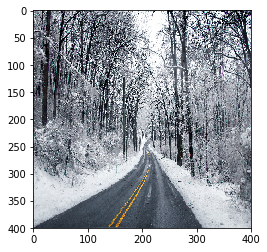

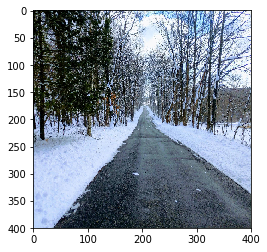

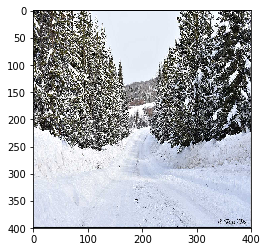

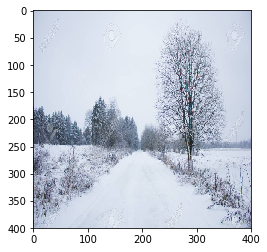

[[0.4837785  0.51622146]
 [0.42683598 0.57316405]
 [0.45456156 0.5454384 ]
 [0.40364304 0.5963569 ]]


In [26]:
from matplotlib import pyplot as plt
import cv2

# im1 = np.array(cv2.imread("../input/Data/test/clear/test1.jpg"))
# im2 = np.array(cv2.imread("../input/Data/test/clear/test2.jpg"))
# im3 = np.array(cv2.imread("../input/Data/test/snowy/test3.JPG"))
# im4 = np.array(cv2.imread("../input/Data/test/snowy/test4.jpg"))
# lst = [im1, im2, im3, im4]


for i in test_batches[0][0]:
#     image = np.array(i)
#     cv2.imshow("test", i)
    plt.imshow(i)
    plt.show()
    

    
#     prediction = model.predict(i)    
#     print(prediction)
    
# print(len(test_batches[0][0][1]))


predictions = model.predict(test_batches)    
print(predictions)
    





